<a href="https://colab.research.google.com/github/oliveiraprg/formacao-cientista-de-dados/blob/main/limpeza_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Carregando, verificando e fazendo correções necessárias nas colunas dos dados

In [2]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [53]:
dataset = pd.read_csv("/content/Churn.csv", sep=';')
dataset

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,838,SC,Masculino,43,9,12310588,2,1,0,14576583.0,0
995,997,610,SC,Masculino,29,9,0,3,0,1,8391224.0,0
996,998,811,SC,Masculino,44,3,0,2,0,1,7843973.0,0
997,999,587,SC,Masculino,62,7,12128627,1,0,1,677692.0,0


In [4]:
dataset.shape

(999, 12)

##Renomeando as colunas

In [5]:
dataset.columns = ["Id", "Score", "Estado", "Genero", "Idade", "Patrimonio", "Saldo", "Produtos", "TemCartCredito", "Ativo", "Salario", "Saiu"]

In [6]:
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


# Análise Exploratória dos dados

###Verificando a distribuição dos dados

In [33]:
agrupado = dataset.groupby(['Estado']).size()
agrupado

,0
Estado,
PR,257
RP,1
RS,478
SC,258
SP,4
TD,1


<Axes: xlabel='Estado'>

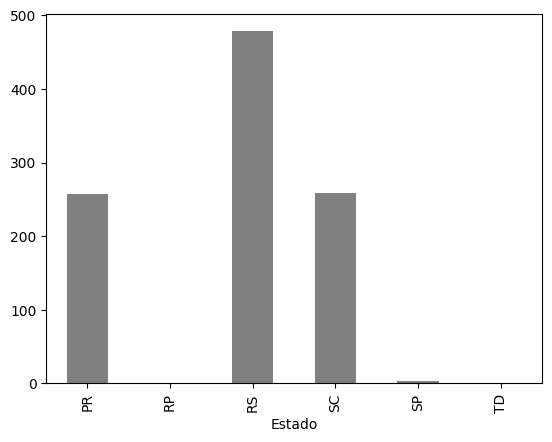

In [8]:
agrupado.plot.bar(color='gray')

In [9]:
agrupado = dataset.groupby(['Genero']).size()
agrupado

,0
Genero,
F,2
Fem,1
Feminino,461
M,6
Masculino,521


<Axes: xlabel='Genero'>

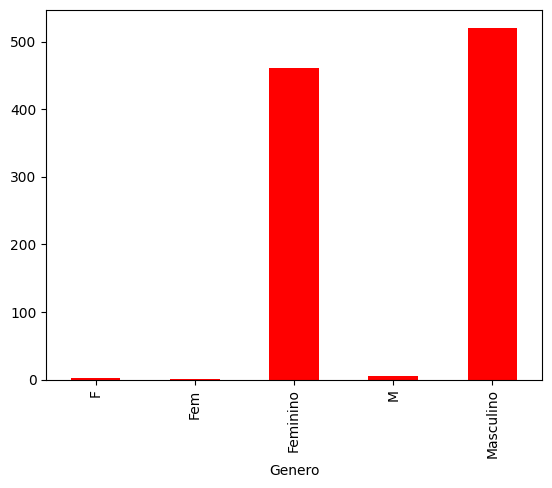

In [ ]:
agrupado.plot.bar(color='red')

In [ ]:
dataset['Score'].describe()

,Score
count,999.000000
mean,648.621622
std,98.264219
min,376.000000
25%,580.000000
50%,653.000000
75%,721.000000
max,850.000000


Text(0.5, 1.0, 'Score')

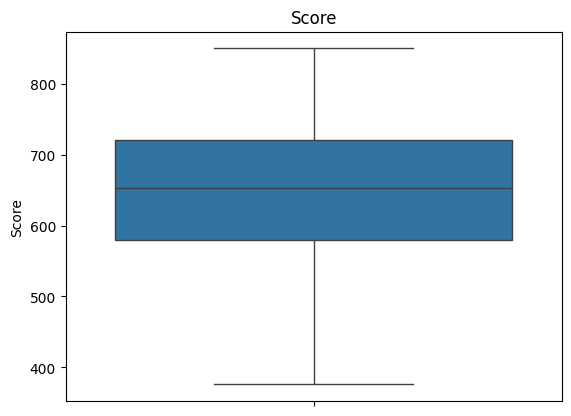

In [11]:
srn.boxplot(dataset['Score']).set_title('Score')

Text(0.5, 1.0, 'Score')

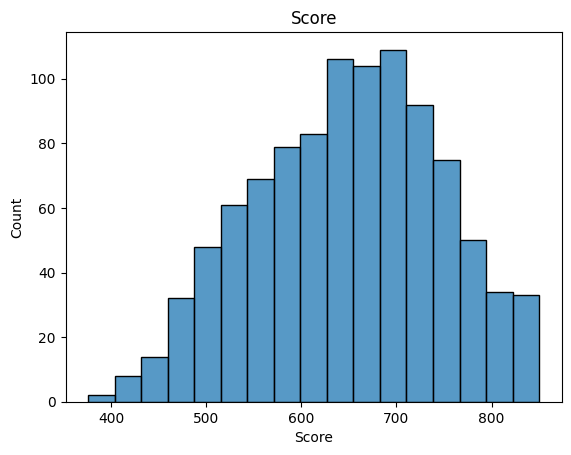

In [14]:
srn.histplot(dataset['Score']).set_title('Score')

In [13]:
dataset['Idade'].describe()

,Idade
count,999.000000
mean,38.902903
std,11.401912
min,-20.000000
25%,32.000000
50%,37.000000
75%,44.000000
max,140.000000


Text(0.5, 1.0, 'Idade')

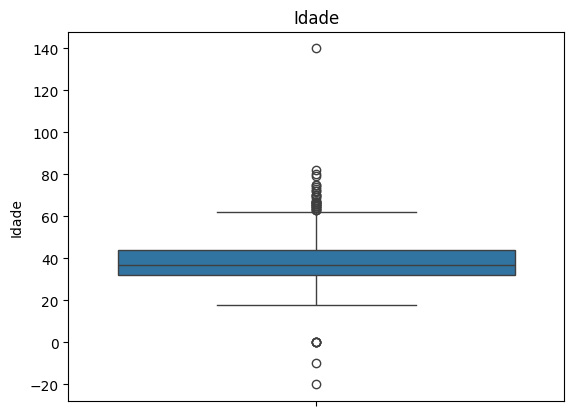

In [15]:
srn.boxplot(dataset['Idade']).set_title('Idade')

Text(0.5, 1.0, 'Idade')

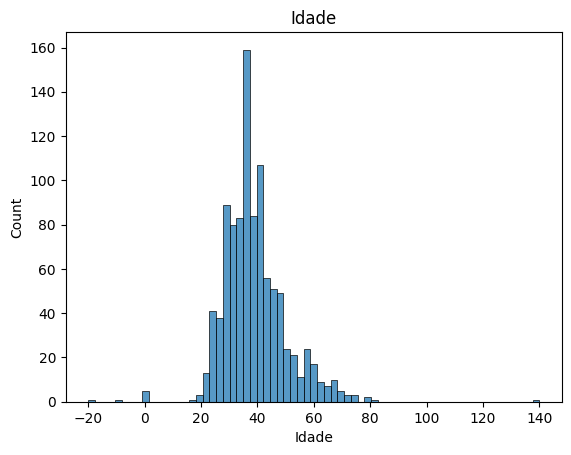

In [16]:
srn.histplot(dataset['Idade']).set_title('Idade')

In [17]:
dataset['Saldo'].describe()

,Saldo
count,9.990000e+02
mean,7.164928e+06
std,6.311840e+06
min,0.000000e+00
25%,0.000000e+00
50%,8.958835e+06
75%,1.258684e+07
max,2.117743e+07


Text(0.5, 1.0, 'Saldo')

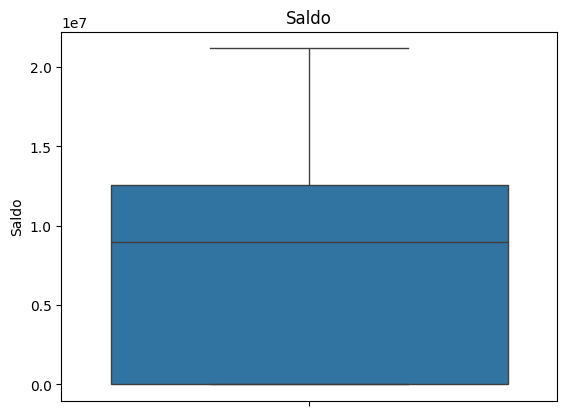

In [18]:
srn.boxplot(dataset['Saldo']).set_title('Saldo')

Text(0.5, 1.0, 'Saldo')

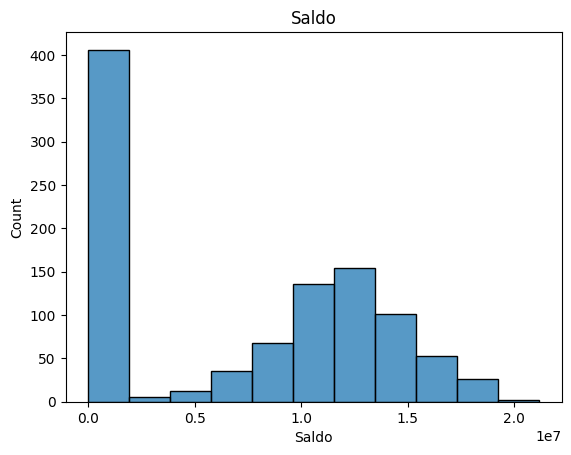

In [19]:
srn.histplot(dataset['Saldo']).set_title('Saldo')

In [20]:
dataset['Salario'].describe()

,Salario
count,9.920000e+02
mean,3.528762e+07
std,5.305800e+08
min,9.677000e+03
25%,3.029011e+06
50%,8.703250e+06
75%,1.405213e+07
max,1.193469e+10


Text(0.5, 1.0, 'Salario')

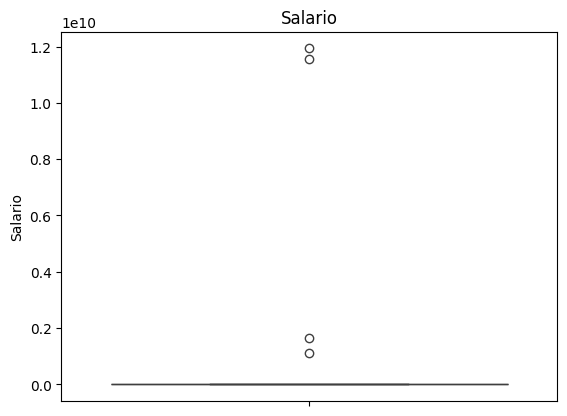

In [22]:
srn.boxplot(dataset['Salario']).set_title('Salario')

Text(0.5, 1.0, 'Salario')

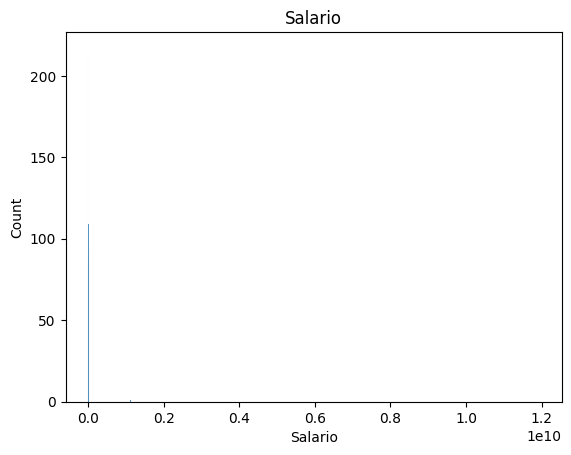

In [23]:
srn.histplot(dataset['Salario']).set_title('Salario')

#Tratamento dos dados

##Verificando dados nulos

In [32]:
#Verificando valores nulos
dataset.isnull().sum()

,0
Id,0
Score,0
Estado,0
Genero,8
Idade,0
Patrimonio,0
Saldo,0
Produtos,0
TemCartCredito,0
Ativo,0


##Fazendo correção nos dados nulos

###Corrigindo dados numéricos

####Correção no Salário

In [25]:
dataset['Salario'].describe()

,Salario
count,9.920000e+02
mean,3.528762e+07
std,5.305800e+08
min,9.677000e+03
25%,3.029011e+06
50%,8.703250e+06
75%,1.405213e+07
max,1.193469e+10


In [29]:
#Verificando Mediana
mediana = sts.median(dataset['Salario'])
mediana

70518.0

In [30]:
#Susbstituindo valores nulos pela mediana
dataset['Salario'].fillna(mediana, inplace=True)

In [31]:
dataset['Salario'].isnull().sum()

0

####Correção na Idade

In [41]:
#Verificando os dados
dataset['Idade'].describe()

,Idade
count,999.000000
mean,38.902903
std,11.401912
min,-20.000000
25%,32.000000
50%,37.000000
75%,44.000000
max,140.000000


In [43]:
#Verificando dados fora do padrão de idade
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [44]:
#Calculando a mediana da idade
mediana = sts.median(dataset['Idade'])
mediana

37

In [46]:
#substituindo valores
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120)] = mediana

####Verificação e correção de dados duplicados por ID

In [47]:
#buscar dados duplicados pelo ID
dataset[dataset.duplicated(['Id'], keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
36,37,490,SC,Masculino,31,3,14526023,1,0,1,11406677.0,0
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
867,37,37,37,37,37,37,37,37,37,37,37.0,37
984,37,37,37,37,37,37,37,37,37,37,37.0,37
990,37,37,37,37,37,37,37,37,37,37,37.0,37


In [48]:
#Excluindo dados duplicados
dataset.drop_duplicates(subset="Id", keep='first', inplace=True)

###Corrigindo dados históricos

####Corrigindo dados de Gênero


In [35]:
#Verificando os NANs do Gênero
dataset['Genero'].isnull().sum()

8

In [36]:
#Prenchendo NANs com a MODA
dataset['Genero'].fillna('Masculino', inplace=True)

In [37]:
#Verificando os NANs do Gênero
dataset['Genero'].isnull().sum()

0

In [40]:
#Padronizar os valores de acordo com o domínio
dataset.loc[dataset['Genero'] == 'M', 'Genero'] = 'Masculino'
dataset.loc[dataset['Genero'].isin(['Fem', 'F']), 'Genero'] = 'Masculino'
#visualizando os resultados
agrupado = dataset.groupby(['Genero']).size()
agrupado

,0
Genero,
Feminino,461
Masculino,538


####Corrigindo dados outliers dos estados

In [51]:
#Verificando dados fora do domínio
agrupado = dataset.groupby(['Estado']).size()
agrupado

,0
Estado,
PR,257
RP,1
RS,474
SC,258
SP,4
TD,1


In [52]:
#Atribuimos a Moda para os dados fora do padrão
dataset.loc[dataset['Estado'].isin(['RP', 'SP', 'TD']), 'Estado'] = 'RS'
agrupado = dataset.groupby(['Estado']).size()
agrupado

,0
Estado,
PR,257
RS,480
SC,258
